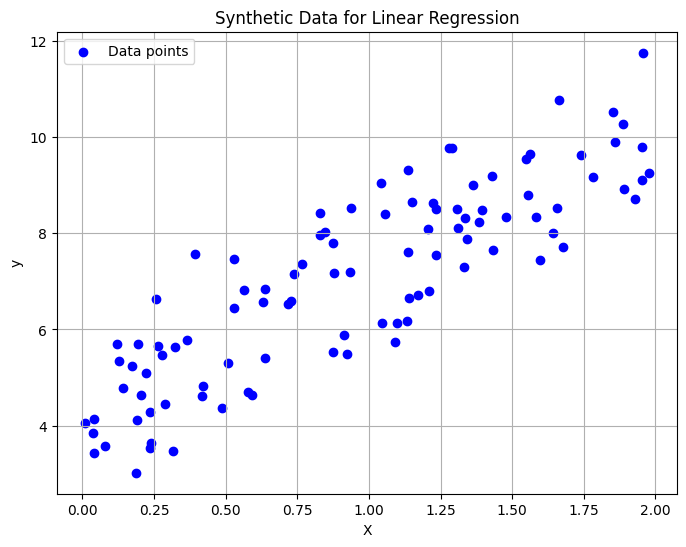

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from code_1 import *
# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)  # Generate 100 random numbers between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3*X + noise

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, marker='o', color='b', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
lr = SimpleLinearRegression()

In [3]:
lr.fit(X,y)

In [4]:
y_pred = lr.predict(X)

In [5]:
lr.MSE

0.9924386487246479

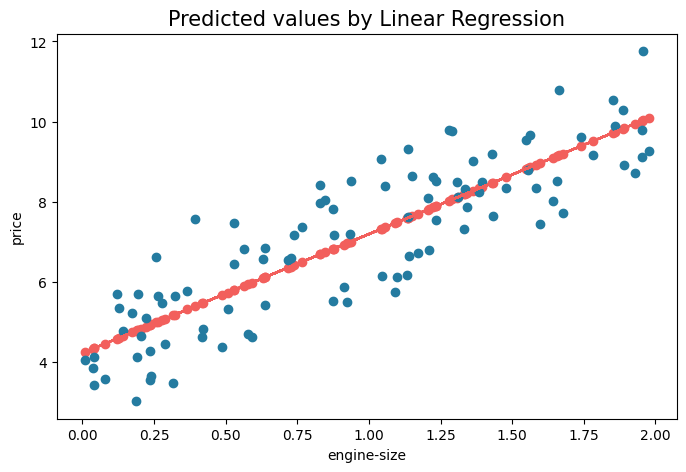

In [6]:
plt.figure(figsize = (8, 5))
plt.plot(X, y_pred, color = '#f25f5c')
plt.scatter(X, y_pred, color = '#f25f5c')

plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(X, y, color = "#247ba0")
plt.show()

In [7]:
import pandas as pd
df = pd.read_csv('Automobile_data.csv')
df.shape


(205, 26)

In [8]:
try:
    df[['price']] = df[['price']].astype(int)
except ValueError:
    print("Trying out the line of code above will result to this error:\n")
    print("Value Error: invalid literal for int() with base 10: '?'")

Trying out the line of code above will result to this error:

Value Error: invalid literal for int() with base 10: '?'


In [9]:
df = df.loc[df['price']!='?']
df[['price']] = df[['price']].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [41]:
final_data = df[['engine-size', 'price']]
predictor = df['wheel-base']
target = df['price']

In [33]:
print(predictor.shape)

(201,)


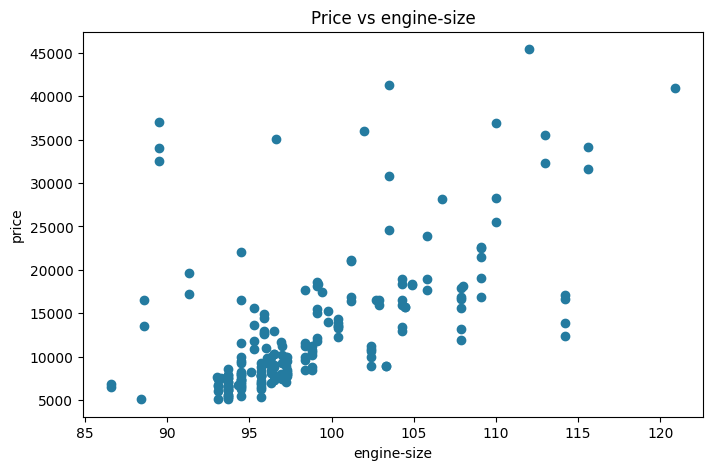

In [42]:
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

In [43]:
lr = SimpleLinearRegression()
lr.fit(predictor,target)

In [44]:
predicted = lr.predict(predictor)

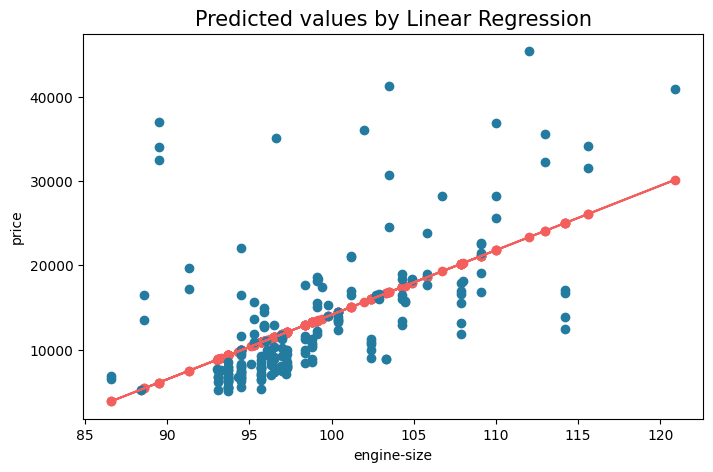

In [45]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [46]:
lr.r2score_

0.3418060603419337

In [47]:
from sklearn.linear_mlr import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.34180606034193384


In [105]:
predictor = df[['wheel-base','engine-size']]

In [106]:
mlr = MultipleLinearRegression()
mlr.fit(predictor,target)

In [107]:
predicted = mlr.predict(predictor)

In [70]:
coef = mlr.coefficients_

In [87]:
# Create a grid of values
x1_range = np.linspace(predictor['engine-size'].min(), predictor['engine-size'].max(), 1000)
x2_range = np.linspace(predictor['wheel-base'].min(), predictor['wheel-base'].max(), 1000)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict the target values for the grid
y_grid = coef[0] + coef[1] * x1_grid + coef[2] * x2_grid


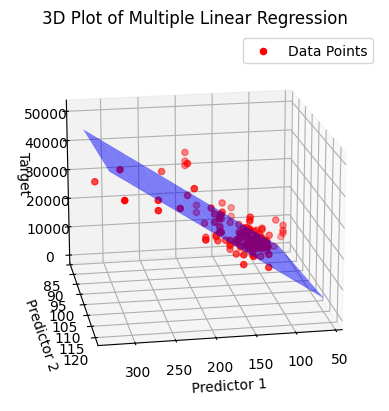

In [96]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, rstride=100, cstride=100, color='b')

# Plot the data points
ax.scatter(predictor['engine-size'], predictor['wheel-base'], target, color='r', label='Data Points')

# Label the axes
ax.set_xlabel('Predictor 1')
ax.set_ylabel('Predictor 2')
ax.set_zlabel('Target')
ax.set_title('3D Plot of Multiple Linear Regression')
# Set the viewing angle
ax.view_init(elev=18, azim=80)  # Change elev and azim as needed
# Show the plot
plt.legend()
plt.show()


In [98]:
# Print the multiple linear equation, coefficients, and intercept
print(f"Multilinear equation: y = {mlr.coefficients_[0]:.2f} + {mlr.coefficients_[1]:.2f}x1 + {mlr.coefficients_[2]:.2f}x2")
print(f"Coefficients: {mlr.coefficients_[1:]}")
print(f"Intercept: {mlr.intercept_:.2f}")

# Print the residuals, total sum of squares, residual sum of squares, and R-squared
# print(f"Residuals: {mlr.residuals_}")
print(f"Total sum of squares (TSS): {mlr.TSS:.2f}")
print(f"Residual sum of squares (RSS): {mlr.RSS:.2f}")
print(f"Coefficient of determination (R^2): {mlr.r2score_:.2f}")

# Print the (MAE), (MSE), and (RMSE)
print(f"Mean Absolute Error (MAE): {mlr.MAE:.2f}")
print(f"Mean Squared Error (MSE): {mlr.MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {mlr.RMSE:.2f}")

Multilinear equation: y = -22671.59 + 166.76x1 + 152.93x2
Coefficients: [166.76028508 152.93166922]
Intercept: -22671.59
Total sum of squares (TSS): 12631172688.64
Residual sum of squares (RSS): 2881541554.04
Coefficient of determination (R^2): 0.77
Mean Absolute Error (MAE): 2663.64
Mean Squared Error (MSE): 14336027.63
Root Mean Squared Error (RMSE): 3786.29


In [108]:
reg = LinearRegression()
# predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.771870623174322


In [110]:
mlr.r2score_

0.771870623174322